# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
# pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]

In [7]:
non_fraud.shape

(284315, 31)

In [8]:
fraud.shape

(492, 31)

Balancing data

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
data = fraud.append(non_fraud, ignore_index=True)

In [11]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,148629.0,0.340412,0.132211,-2.229970,-1.599404,3.150232,3.295249,0.775382,0.609661,0.540504,-1.156649,-0.028236,-0.103127,-0.520212,-1.469495,-0.418274,-0.160375,0.649919,0.084306,-0.349920,0.099114,-0.002266,0.163861,0.493488,0.568806,-1.919060,-0.465749,0.200354,0.167314,91.91,0
980,59221.0,-1.761013,-2.986331,1.980669,-1.359352,1.642570,0.308636,-2.195809,0.648208,-2.310869,1.518244,2.070943,-0.392154,-0.212365,-0.093968,1.464634,-1.736504,1.609771,-1.144589,-0.645036,0.363488,0.044059,0.041679,0.626085,-1.088218,-0.839165,-0.285131,-0.018851,-0.060223,35.40,0
981,83063.0,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,-1.022946,-0.191423,0.631027,0.031907,-0.031425,1.446627,-0.121820,-0.651405,0.617970,0.927600,0.005757,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00,0
982,160177.0,0.631670,-4.507367,-2.518337,-1.687783,-0.132850,4.369624,-1.063966,0.853060,-0.717894,0.970412,-0.619762,-0.315555,0.334333,-0.664237,-0.901369,-0.838678,0.833393,-0.510502,-0.050295,1.287540,-0.056155,-1.449865,-0.232752,0.690979,-0.780149,-0.540451,-0.081099,0.099420,835.00,0


In [12]:
data.shape

(984, 31)

In [13]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [14]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,984.0,88416.980691,47626.738666,242.000000,48524.750000,82291.000000,133430.250000,172502.000000
V1,984.0,-2.360191,5.511939,-30.552380,-2.858263,-0.768559,1.068827,2.289557
V2,984.0,1.785147,3.729886,-15.650427,-0.176052,0.964356,2.814266,22.057729
V3,984.0,-3.515816,6.216683,-31.103685,-5.113334,-1.376748,0.329488,3.178416
V4,984.0,2.255601,3.205419,-3.599023,-0.108051,1.307692,4.274853,12.114672
V5,984.0,-1.570120,4.250013,-22.105532,-1.873814,-0.412995,0.449908,11.095089
V6,984.0,-0.655405,1.827281,-7.300573,-1.564562,-0.654786,0.090037,9.291293
V7,984.0,-2.804745,5.878016,-43.557242,-3.105154,-0.670645,0.226119,19.194427
V8,984.0,0.274666,4.906128,-41.044261,-0.212663,0.177930,0.892259,20.007208
V9,984.0,-1.320292,2.301905,-13.434066,-2.338449,-0.751057,0.172148,4.109824


Separating labels and training data

In [19]:
labels = data['Class']
data.drop(columns='Class', inplace=True)

In [20]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Converting dataframes into numpy arrays

In [21]:
labels = np.array(labels.astype('float32'))
data = np.array(data)

In [22]:
data.dtype

dtype('float64')

Splitting training and testing data

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
train_data, test_data, train_l, test_l = train_test_split(data, labels, test_size=0.3)

In [24]:
train_data.shape, train_l.shape

((688, 30), (688,))

In [25]:
test_data.shape, test_l.shape

((296, 30), (296,))

Normalization

In [52]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [53]:
test_data

array([[ 0.10073198, -0.28454851,  1.06925752, ...,  1.75678796,
         2.3404394 , -0.13944218],
       [-0.26664092,  0.42059521, -0.1603364 , ..., -0.18384758,
        -0.37890525, -0.3665546 ],
       [-0.4199344 , -0.18001123,  0.33393507, ..., -0.13099045,
         0.16730906, -0.33651969],
       ...,
       [-0.83225318,  0.20011093, -0.1682758 , ..., -0.23856272,
        -0.15801585, -0.2910426 ],
       [-0.05453372,  0.59481092, -0.45492442, ..., -0.07102202,
        -0.01555256,  0.09322215],
       [ 1.47416602,  0.8341162 , -0.5871118 , ..., -0.18781608,
        -0.35055586, -0.30891185]])

Splitting partial train data and Validation data

In [54]:
partial_train, val_train, partial_l, val_l = train_test_split(train_data, train_l, test_size=0.2)

In [55]:
val_train.shape, val_l.shape

((138, 30), (138,))

<h3>Building Model</h3>

In [56]:
from keras import models, layers

In [57]:
def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='acc')
    return model

In [58]:
network = build_model('relu')

In [59]:
history = network.fit(partial_train, partial_l, epochs=100, batch_size=1, validation_data=(val_train, val_l))

Epoch 1/100
550/550 [==============================] - 2s 3ms/step - loss: 0.5031 - acc: 0.8236 - val_loss: 0.3287 - val_acc: 0.8768
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2549 - acc: 0.9109 - val_loss: 0.2943 - val_acc: 0.8841
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2215 - acc: 0.9164 - val_loss: 0.2648 - val_acc: 0.8986
Epoch 4/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2096 - acc: 0.9218 - val_loss: 0.2359 - val_acc: 0.9130
Epoch 5/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1923 - acc: 0.9236 - val_loss: 0.2099 - val_acc: 0.9348
Epoch 6/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1824 - acc: 0.9364 - val_loss: 0.2117 - val_acc: 0.9348
Epoch 7/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1835 - acc: 0.9400 - val_loss: 0.2085 - val_acc: 0.9348
Epoch 8/100
550/550 [==============================] - 1s 2ms/step - 

Epoch 62/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1166 - acc: 0.9727 - val_loss: 0.5946 - val_acc: 0.9203
Epoch 63/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1099 - acc: 0.9782 - val_loss: 0.6000 - val_acc: 0.9203
Epoch 64/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1126 - acc: 0.9782 - val_loss: 0.6224 - val_acc: 0.9203
Epoch 65/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1178 - acc: 0.9745 - val_loss: 0.6117 - val_acc: 0.9203
Epoch 66/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1036 - acc: 0.9782 - val_loss: 0.6086 - val_acc: 0.9203
Epoch 67/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1053 - acc: 0.9800 - val_loss: 0.6216 - val_acc: 0.9203
Epoch 68/100
550/550 [==============================] - 1s 2ms/step - loss: 0.0986 - acc: 0.9818 - val_loss: 0.6391 - val_acc: 0.9275
Epoch 69/100
550/550 [==============================] - 1s 2ms

In [60]:
history.historytory.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plot loss and val_loss

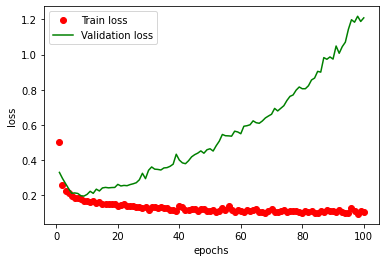

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'g-', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
from keras import regularizers


In [69]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='acc')

In [70]:
history = model.fit(partial_train, partial_l, epochs=100, batch_size=1, validation_data=(val_train, val_l))

Epoch 1/100
550/550 [==============================] - 1s 2ms/step - loss: 0.5284 - acc: 0.8273 - val_loss: 0.4021 - val_acc: 0.8841
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 0.3166 - acc: 0.9055 - val_loss: 0.2830 - val_acc: 0.8913
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2388 - acc: 0.9200 - val_loss: 0.2548 - val_acc: 0.9058
Epoch 4/100
550/550 [==============================] - 1s 3ms/step - loss: 0.2190 - acc: 0.9327 - val_loss: 0.2363 - val_acc: 0.9203
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 0.2130 - acc: 0.9382 - val_loss: 0.2223 - val_acc: 0.9203
Epoch 6/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1978 - acc: 0.9400 - val_loss: 0.2166 - val_acc: 0.9275
Epoch 7/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1919 - acc: 0.9400 - val_loss: 0.2061 - val_acc: 0.9203
Epoch 8/100
550/550 [==============================] - 1s 2ms/step - 

Epoch 62/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1555 - acc: 0.9600 - val_loss: 0.2923 - val_acc: 0.9348
Epoch 63/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1487 - acc: 0.9564 - val_loss: 0.2808 - val_acc: 0.9493
Epoch 64/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1470 - acc: 0.9582 - val_loss: 0.2822 - val_acc: 0.9348
Epoch 65/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1502 - acc: 0.9545 - val_loss: 0.2878 - val_acc: 0.9275
Epoch 66/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1444 - acc: 0.9564 - val_loss: 0.2891 - val_acc: 0.9203
Epoch 67/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1442 - acc: 0.9545 - val_loss: 0.2843 - val_acc: 0.9348
Epoch 68/100
550/550 [==============================] - 1s 2ms/step - loss: 0.1427 - acc: 0.9600 - val_loss: 0.2826 - val_acc: 0.9420
Epoch 69/100
550/550 [==============================] - 1s 2ms

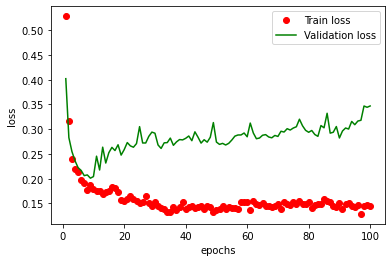

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'g-', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

###  Final training

In [73]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='acc')
model.fit(train_data, train_l, epochs=10, batch_size=1)

Epoch 1/10
688/688 [==============================] - 1s 1ms/step - loss: 0.5679 - acc: 0.7224
Epoch 2/10
688/688 [==============================] - 1s 1ms/step - loss: 0.3495 - acc: 0.9055
Epoch 3/10
688/688 [==============================] - 1s 2ms/step - loss: 0.2522 - acc: 0.9142
Epoch 4/10
688/688 [==============================] - 1s 2ms/step - loss: 0.2188 - acc: 0.9346
Epoch 5/10
688/688 [==============================] - 1s 2ms/step - loss: 0.1991 - acc: 0.9360
Epoch 6/10
688/688 [==============================] - 1s 2ms/step - loss: 0.1870 - acc: 0.9360
Epoch 7/10
688/688 [==============================] - 1s 2ms/step - loss: 0.1835 - acc: 0.9419
Epoch 8/10
688/688 [==============================] - 1s 1ms/step - loss: 0.1816 - acc: 0.9419
Epoch 9/10
688/688 [==============================] - 1s 1ms/step - loss: 0.1727 - acc: 0.9404
Epoch 10/10
688/688 [==============================] - 1s 1ms/step - loss: 0.1635 - acc: 0.9419


In [74]:
model.evaluate(test_data, test_l)

10/10 [==============================] - 0s 1ms/step - loss: 0.1767 - acc: 0.9426


[0.17672230303287506, 0.9425675868988037]

In [75]:
pred  = model.predict(test_data)

In [77]:
pred[:5]

array([[1.        ],
       [0.00881287],
       [0.00692943],
       [0.00977576],
       [0.01647919]], dtype=float32)

In [78]:
test_l[:5]

array([1., 0., 0., 0., 0.], dtype=float32)